In [2]:
from PIL import Image
import os

In [3]:
# black and white conversion
path = '../00_source_data/shopee-product-matching/train_images'
# image_filenames = os.listdir(path)
# def preprocess_image(image_filename, save_dir):
#     # Open the image using Pillow
#     image = Image.open(os.path.join(path, image_filename))
    
#     # Convert the image to grayscale
#     image = image.convert('L')
    
#     # Resize the image to 100x100 pixels
#     image = image.resize((100, 100))
    
#     # Save the preprocessed image to a new directory
#     save_path = os.path.join(save_dir, image_filename)
#     image.save(save_path)

In [4]:
def preprocess_image(image_filename, save_dir):
    # Open the image using Pillow
    image = Image.open(os.path.join(path, image_filename))
    
    # Resize the image to 100x100 pixels
    image = image.resize((100, 100))
    
    # Save the preprocessed image to a new directory
    save_path = os.path.join(save_dir, image_filename)
    image.save(save_path)

In [5]:
save_dir = '../20_intermediate_files/Trained_pre_processed'

# Create the new directory if it does not already exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Get a list of all image filenames in the directory
image_filenames = os.listdir(path)

# Preprocess and save each image in the new directory
for image_filename in image_filenames:
    preprocess_image(image_filename, save_dir)

In [49]:
# check number of images in the directory
len(os.listdir(save_dir))

32412

In [53]:
len(os.listdir(path))

32412

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [57]:
def get_rgb(image_filename):
    with Image.open(image_filename) as img:
        rgb_values = np.array(img.convert('RGB')).reshape(-1, 3)
    return rgb_values


In [58]:
df = pd.read_csv('/Users/isingh/Desktop/shopee-product-matching/train.csv')

In [59]:
# get the rgb values for each image
df['rgb_values'] = df['image'].apply(lambda x: get_rgb(os.path.join('/Users/isingh/Desktop/shopee-product-matching/Trained_pre_processed', x)))

In [60]:
df

,posting_id,image,image_phash,title,label_group,rgb_values
0,train_129225211,0000a68812bc7e98c42888dfb1c07da0.jpg,94974f937d4c2433,Paper Bag Victoria Secret,249114794,"[[139, 73, 74], [150, 86, 86], [156, 96, 96], ..."
1,train_3386243561,00039780dfc94d01db8676fe789ecd05.jpg,af3f9460c2838f0f,"Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...",2937985045,"[[255, 255, 255], [255, 255, 255], [255, 255, ..."
2,train_2288590299,000a190fdd715a2a36faed16e2c65df7.jpg,b94cb00ed3e50f78,Maling TTS Canned Pork Luncheon Meat 397 gr,2395904891,"[[207, 202, 196], [206, 201, 195], [206, 201, ..."
3,train_2406599165,00117e4fc239b1b641ff08340b429633.jpg,8514fc58eafea283,Daster Batik Lengan pendek - Motif Acak / Camp...,4093212188,"[[248, 248, 248], [255, 255, 255], [252, 252, ..."
4,train_3369186413,00136d1cf4edede0203f32f05f660588.jpg,a6f319f924ad708c,Nescafe \xc3\x89clair Latte 220ml,3648931069,"[[255, 255, 255], [255, 255, 255], [255, 255, ..."
...,...,...,...,...,...,...
34245,train_4028265689,fff1c07ceefc2c970a7964cfb81981c5.jpg,e3cd72389f248f21,Masker Bahan Kain Spunbond Non Woven 75 gsm 3 ...,3776555725,"[[197, 255, 217], [176, 237, 196], [172, 234, ..."
34246,train_769054909,fff401691371bdcb382a0d9075dfea6a.jpg,be86851f72e2853c,MamyPoko Pants Royal Soft - S 70 - Popok Celana,2736479533,"[[255, 252, 255], [252, 249, 255], [255, 254, ..."
34247,train_614977732,fff421b78fa7284284724baf249f522e.jpg,ad27f0d08c0fcbf0,KHANZAACC Robot RE101S 1.2mm Subwoofer Bass Me...,4101248785,"[[255, 255, 255], [255, 255, 255], [255, 255, ..."
34248,train_3630949769,fff51b87916dbfb6d0f8faa01bee67b8.jpg,e3b13bd1d896c05c,"Kaldu NON MSG HALAL Mama Kamu Ayam Kampung , S...",1663538013,"[[32, 243, 255], [30, 224, 251], [65, 223, 248..."


In [61]:
# group by label group and concatenate the rgb values
df1 = df.groupby('label_group')['rgb_values'].apply(lambda x: np.concatenate(x.values)).reset_index()

In [70]:
# split the rgb values into 3 values and convert that into a column 
df1['r'] = df1['rgb_values'].apply(lambda x: x[:, 0])
df1['g'] = df1['rgb_values'].apply(lambda x: x[:, 1])
df1['b'] = df1['rgb_values'].apply(lambda x: x[:, 2])

In [71]:
df1

,label_group,rgb_values,r,g,b
0,258047,"[[220, 227, 237], [213, 222, 229], [215, 228, ...","[220, 213, 215, 206, 226, 236, 216, 235, 223, ...","[227, 222, 228, 217, 230, 234, 205, 226, 222, ...","[237, 229, 234, 219, 233, 235, 209, 227, 218, ..."
1,297977,"[[255, 255, 255], [255, 255, 255], [255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
2,645628,"[[251, 255, 255], [251, 255, 255], [254, 255, ...","[251, 251, 254, 254, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 254, 254, 253, ...","[255, 255, 255, 255, 255, 253, 253, 251, 250, ..."
3,801176,"[[254, 254, 254], [254, 254, 254], [254, 254, ...","[254, 254, 254, 254, 254, 254, 254, 254, 254, ...","[254, 254, 254, 254, 254, 254, 254, 254, 254, ...","[254, 254, 254, 254, 254, 254, 254, 254, 254, ..."
4,887886,"[[255, 255, 255], [255, 255, 255], [255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ...","[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
...,...,...,...,...,...
11009,4292154092,"[[31, 133, 33], [31, 133, 33], [31, 136, 33], ...","[31, 31, 31, 32, 34, 35, 37, 37, 40, 40, 42, 4...","[133, 133, 136, 137, 139, 140, 142, 142, 142, ...","[33, 33, 33, 34, 36, 37, 41, 41, 43, 43, 48, 4..."
11010,4292520070,"[[255, 255, 251], [255, 255, 251], [255, 255, ...","[255, 255, 255, 250, 255, 255, 249, 221, 191, ...","[255, 255, 255, 246, 249, 252, 237, 209, 176, ...","[251, 251, 251, 243, 249, 253, 239, 211, 181, ..."
11011,4292939171,"[[65, 65, 41], [64, 64, 40], [63, 63, 39], [62...","[65, 64, 63, 62, 63, 64, 65, 65, 70, 70, 72, 7...","[65, 64, 63, 62, 61, 62, 63, 63, 65, 65, 66, 6...","[41, 40, 39, 38, 38, 39, 40, 40, 43, 43, 44, 4..."
11012,4293276364,"[[247, 250, 255], [254, 254, 255], [255, 252, ...","[247, 254, 255, 254, 255, 255, 255, 255, 255, ...","[250, 254, 252, 248, 251, 250, 248, 248, 245, ...","[255, 255, 255, 252, 253, 250, 243, 241, 235, ..."


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0        [0.9294117647058824, 0.8980392156862745, 0.917...
1        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
2        [1.0, 1.0, 1.0, 1.0, 1.0, 0.9921568627450981, ...
3        [0.996078431372549, 0.996078431372549, 0.99607...
4        [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...
                               ...                        
11009    [0.12941176470588237, 0.12941176470588237, 0.1...
11010    [0.984313725490196, 0.984313725490196, 0.98431...
11011    [0.1607843137254902, 0.1568627450980392, 0.152...
11012    [1.0, 1.0, 1.0, 0.9882352941176471, 0.99215686...
11013    [0.1568627450980392, 0.17254901960784313, 0.18...
Name: b, Length: 11014, dtype: object

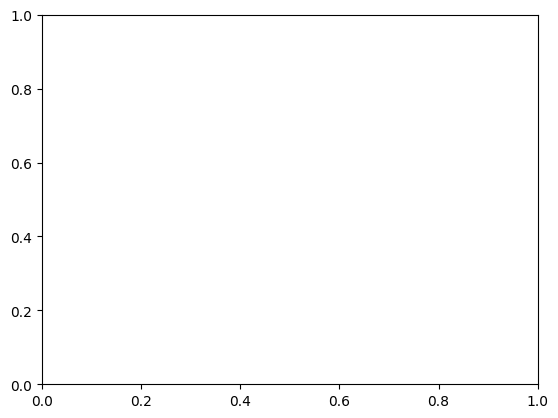

In [76]:
plt.scatter(df1['r'], df1['g'], c=df1['b'] / 255, alpha=0.5)

# Set axis labels and title
plt.xlabel('Red')
plt.ylabel('Green')
plt.title('RGB Scatter Plot')

# Show the plot
plt.show()